### Analyzing and Visualizations for Comparison of European Countries

* Europe is a continent located entirely in the Northern Hemisphere and mostly in the Eastern Hemisphere. It is bordered by the Arctic Ocean to the north, the Atlantic Ocean to the west, Asia to the east, and the Mediterranean Sea to the south. It comprises the westernmost part of Eurasia

* Europe covers about 10,180,000 square kilometres (3,930,000 sq mi), or 2% of the Earth's surface (6.8% of land area). Politically, Europe is divided into about fifty sovereign states of which the Russian Federation is the largest and most populous, spanning 39% of the continent and comprising 15% of its population. Europe had a total population of about 741 million (about 11% of the world population) as of 2016.The European climate is largely affected by warm Atlantic currents that temper winters and summers on much of the continent, even at latitudes along which the climate in Asia and North America is severe. Further from the sea, seasonal differences are more noticeable than close to the coast.

* Europe, in particular ancient Greece and ancient Rome, was the birthplace of Western civilization. The fall of the Western Roman Empire in 476 AD and the subsequent Migration Period marked the end of ancient history and the beginning of the Middle Ages. Renaissance humanism, exploration, art and science led to the modern era. Since the Age of Discovery started by Portugal and Spain, Europe played a predominant role in global affairs. Between the 16th and 20th centuries, European powers controlled at various times the Americas, almost all of Africa and Oceania and the majority of Asia.


<img src="http://wallpoper.com/images/00/40/48/35/europe-boats_00404835.jpg" width="800px">

 **Datasets Used for Analysis**

In [1]:
!pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-cp36-none-any.whl size=5428 sha256=290f8e826b11772b2d3f1ac5a199ac06a261e2139f0dc95c6fb38343f24ce8d2
  Stored in directory: /root/.cache/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


In [2]:
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
from bubbly.bubbly import bubbleplot 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# for providing path
import os
print(os.listdir("../input"))

['life_satisfaction_2013.csv', 'life_expectancy_2016.csv', 'unemployment_2016.csv', 'crime_2016.csv', 'close_relations_2015.csv', 'median_income_2016.csv', 'weather.csv', 'trust_in_police_2013.csv', 'gdp_2016.csv', 'job_satisfaction_2013.csv', 'work_hours_2016.csv', 'make_ends_meet_2016.csv', 'low_savings_2016.csv', 'pollution_2016.csv', 'env_satisfaction_2013.csv', 'leisure_satisfaction_2013.csv', 'trust_in_politics_2013.csv', 'population_2011.csv', 'underemployment_2016.csv', 'perceived_health_2016.csv', 'trust_in_legal_2013.csv']


In [3]:
pollution = pd.read_csv('../input/pollution_2016.csv')
env_satisfaction = pd.read_csv('../input/env_satisfaction_2013.csv')
life_satisfaction = pd.read_csv('../input/life_satisfaction_2013.csv')
politics = pd.read_csv('../input/trust_in_politics_2013.csv')
income = pd.read_csv('../input/median_income_2016.csv')
legal = pd.read_csv('../input/trust_in_legal_2013.csv')
job_satisfaction = pd.read_csv('../input/job_satisfaction_2013.csv')
budget = pd.read_csv('../input/make_ends_meet_2016.csv')
crime = pd.read_csv('../input/crime_2016.csv')
leisure_satisfaction = pd.read_csv('../input/leisure_satisfaction_2013.csv')
underemployment = pd.read_csv('../input/underemployment_2016.csv')
close_relations = pd.read_csv('../input/close_relations_2015.csv')
low_savings = pd.read_csv('../input/low_savings_2016.csv')
weather = pd.read_csv('../input/weather.csv')
life_expectancy = pd.read_csv('../input/life_expectancy_2016.csv')
unemployment = pd.read_csv('../input/unemployment_2016.csv')
police = pd.read_csv('../input/trust_in_police_2013.csv')
gdp = pd.read_csv('../input/gdp_2016.csv')
health = pd.read_csv('../input/perceived_health_2016.csv')
population = pd.read_csv('../input/population_2011.csv')
work_hours = pd.read_csv('../input/work_hours_2016.csv')

In [4]:
# let's merge all the datasets on the country column.

x = pd.merge(pollution, env_satisfaction,
                on = 'country')
x1 = pd.merge(x, job_satisfaction,
              on = 'country')
x2 = pd.merge(x1, life_satisfaction,
              on = 'country')
x3 = pd.merge(x2, politics,
              on = 'country')
x4 = pd.merge(x3, income,
              on = 'country')
x5 = pd.merge(x4, legal,
              on = 'country')
x6 = pd.merge(x5, budget,
              on = 'country')
x7 = pd.merge(x6, crime,
              on = 'country')
x8 = pd.merge(x7, leisure_satisfaction,
              on = 'country')
x9 = pd.merge(x8, underemployment,
              on = 'country')
x10 = pd.merge(x9, close_relations,
               on = 'country')
x11 = pd.merge(x10, low_savings,
               on = 'country')
x12 = pd.merge(x11, weather,
               on = 'country')
x13 = pd.merge(x12, life_expectancy,
               on = 'country')
x14 = pd.merge(x13, unemployment,
               on = 'country')
x15 = pd.merge(x14, police,
               on = 'country')
x16 = pd.merge(x15, gdp,
               on = 'country')
x17 = pd.merge(x16, health,
               on = 'country')
x18 = pd.merge(x17, population,
               on = 'country')
data = pd.merge(x18, work_hours,
               on = 'country')

# let's drop some of the useless columns present in the dataset
data = data.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
                 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
                  'Unnamed: 15', 'Unnamed: 16'], axis = 1)

data['political_trust_rating'] = data['political_trust_rating']*10
data['legal_trust_rating'] = data['legal_trust_rating']*10
data['unemp_rate'] = data['unemp_rate']*10
data['police_trust_rating'] = data['police_trust_rating']*10
data['total_pop'] = data['total_pop']/805550

# divinding the values of median income and gdp to get the values within the range of 100
# I have used the minimum and maximum values to get the normalized values between 0 and 100.
data['median_income'] = data['median_income']/287
data['gdp'] = data['gdp']/31600


# let's transpose and check the dataset
data = data.transpose()
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
country,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Romania,Slovenia,Slovakia,Finland,Sweden,United Kingdom,Iceland,Norway,Switzerland,Turkey
prct_rpt_pollution,13.2,15.1,13.5,6.8,23.2,9.9,4.6,19.6,10.1,14.1,...,14.5,15.9,9.3,7.2,6.3,9,7.9,6.8,8.9,24.5
prct_env_satis_high,22.2,8.4,33.5,52.2,40.9,18.1,43.7,18.3,23.7,27.9,...,29.1,42.3,22.8,34.7,34.7,38.2,29.2,48.1,41.8,18.3
prct_env_satis_med,70.3,32.6,48.7,36.9,43.1,53.4,46.2,45.2,58.9,61.6,...,55.8,40.1,48.9,56.3,51,50.6,56.6,45.8,46.2,42.3
prct_env_satis_low,7.5,59,17.8,10.9,15.9,28.5,10.1,36.5,17.4,10.5,...,15,17.6,28.3,9,14.4,11.3,14.2,6.1,12,39.5
prct_job_satis_high,23,16.1,29.6,44.4,25,26.6,28.3,14,19.4,20,...,20.4,29.1,29.2,40.8,34.5,28,42.3,39.1,36.6,18.3
prct_job_satis_med,68.5,36.1,51.4,46.4,50.7,55.1,51.7,48.3,59.1,64.7,...,61.6,51.5,48.5,54.6,52.5,49.6,48,53.6,54.9,39.5
prct_job_satis_low,8.5,47.7,19,9.2,24.3,18.4,20,37.7,21.5,15.4,...,18,19.3,22.3,4.7,13,22.4,9.6,7.2,8.5,42.2
prct_life_satis_high,20.9,5.9,21.3,42.7,25,13.5,30.6,12.8,18.4,16.1,...,19.7,20.4,25,38.6,34.4,27.8,38.1,35.6,38.5,11.1
prct_life_satis_med,69.9,29.8,53.3,46.6,55.8,52.1,52.7,51.8,58.4,64.8,...,63.7,55.2,48.6,55.5,56.6,53.2,52.4,54.1,53.5,38.6


In [5]:
df = data.transpose()

## Bubble plots

#### GDP vs Job vs Population(bubble size)

In [6]:
import warnings
warnings.filterwarnings('ignore')


figure = bubbleplot(dataset = df, x_column='gdp', y_column='prct_job_satis_high', 
    bubble_column='country', size_column='total_pop', color_column='country',
    x_title="GDP", y_title="Job Satisfaction", title='GDP vs Job vs Population',
    x_logscale=False, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

* There is no direct relation between GDP and Job satisfacction, because a lot of other unforseeable factors are involved for job satisfaction in the citizens.
* Germany being the Top GDP state has a very low job satisfaction.
* Denmark, Austria, Finland, Norway having a low population, and lower GDP have very high job satisfaction in their states.

#### Income vs Environment Satisfaction(bubble size = population)

In [7]:


import warnings
warnings.filterwarnings('ignore')


figure = bubbleplot(dataset = df, x_column='median_income', y_column='prct_env_satis_high', 
    bubble_column='country', size_column='total_pop', color_column='country',
    x_title="Income", y_title="Environment Satisfaction", title='Income vs Environment vs Population',
    x_logscale=False, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

* The above Bubble plot shows relation between Income, Environment Satisfaction, Population of all the European Countries. The population of a country is symbolised by the size of the bubble. Germany has very high Environment Satisfaction, Income and Population too, Whereas Bulgaria lacks behind in all these three attributes.

* Luxembourg is one of the best european countries as it has the highest income around europe, very high and satisfactory environment and also very low size of population.


#### Life Expectancy vs Pollution(bubble size = population)

In [8]:
import warnings
warnings.filterwarnings('ignore')


figure = bubbleplot(dataset = df, x_column='life_expect', y_column='prct_rpt_crime', 
    bubble_column='country', size_column='total_pop', color_column='country',
    x_title="Life Expectancy", y_title="crime", title='Life Expectancy vs Pollution',
    x_logscale=False, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

* We can firstly conclude that the life expectancy in whole of the Europe is around 75-85 which is an excellant life expectancy rate. 
* Bulgaria has a very high crime rate compared to other European countries.
* Countries such as Iceland, Croatia, and Lithuania have very low crime rate making it a suitable place for all.



In [9]:
import warnings
warnings.filterwarnings('ignore')


figure = bubbleplot(dataset = df, x_column='avg_hrs_worked', y_column='prct_leisure_satis_high', 
    bubble_column='country', size_column='total_pop', color_column='country', 
    x_title="Hours Worked", y_title="Leisure Satisfaction", title='Hours worked vs Leisure Satisfaction',
    x_logscale=False, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

* Again, by instantly looking at the plot we can conclude that the working hours are in the range of 25-45hours a week which is extremely good.
* Turkey is a bad choice as, It is the country with lowest Leisure Expectancy and Hours worked.
* Denmark is the best country in terms of providing leisure to their citizens.

<img src="https://images.adsttc.com/media/images/563c/b089/e58e/ce8c/e300/0095/original/Metropolis_Madrid.gif?1446817925" width="800px">

<img src="https://images.adsttc.com/media/images/563c/ac36/e58e/ce14/7c00/0095/original/San_Pedro_Vaticano.gif?1446816819" width="800px">


**Analyzing some of the Countries**

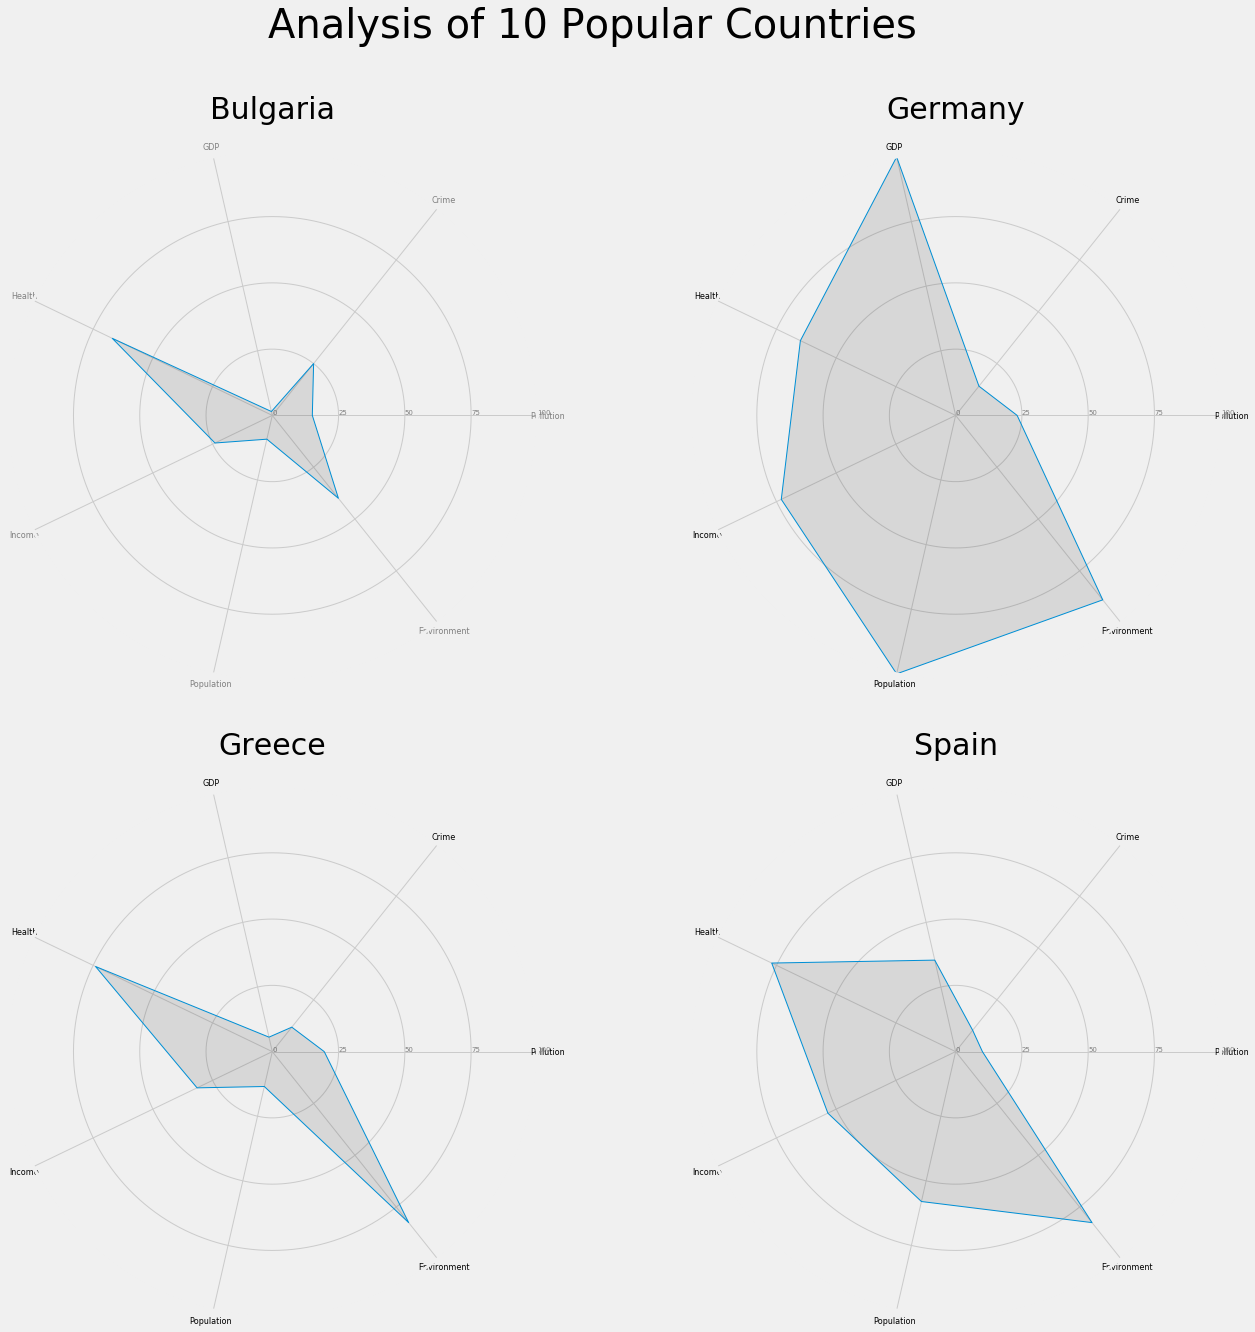

In [10]:
plt.rcParams['figure.figsize'] = (20, 20)

from math import pi

df = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [15.1, 0],
    'Crime': [25, 0],
    'GDP': [1.5, 0],
    'Health': [67, 0],
    'Income': [24, 0],
    'Population': [9.2, 0],
    'Environment': [40, 0]
})
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(221, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Bulgaria', fontsize = 30)

df2 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [23.2, 0],
    'Crime': [14.1, 0],
    'GDP': [100, 0],
    'Health': [65, 0],
    'Income': [73, 0],
    'Population': [100, 0],
    'Environment': [89, 0]
})
# number of variable
categories2 = list(df2)[1:]
N2 = len(categories2)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df2.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N2) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(222, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Germany', fontsize = 30)
df3 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [19.6, 0],
    'Crime': [11.8, 0],
    'GDP': [5.6, 0],
    'Health': [74, 0],
    'Income': [31.5, 0],
    'Population': [13.5, 0],
    'Environment': [82.5, 0]
})
# number of variable
categories3 = list(df3)[1:]
N3 = len(categories3)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df3.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N3) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(223, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Greece', fontsize = 30)

df4 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [10.1, 0],
    'Crime': [10.3, 0],
    'GDP': [35.4, 0],
    'Health': [77, 0],
    'Income': [53.5, 0],
    'Population': [58, 0],
    'Environment': [82.5, 0]
})
# number of variable
categories4 = list(df4)[1:]
N4 = len(categories4)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df4.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N4) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(224, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.suptitle('Analysis of 10 Popular Countries', fontsize = 40)
plt.title('Spain', fontsize = 30)
plt.show()

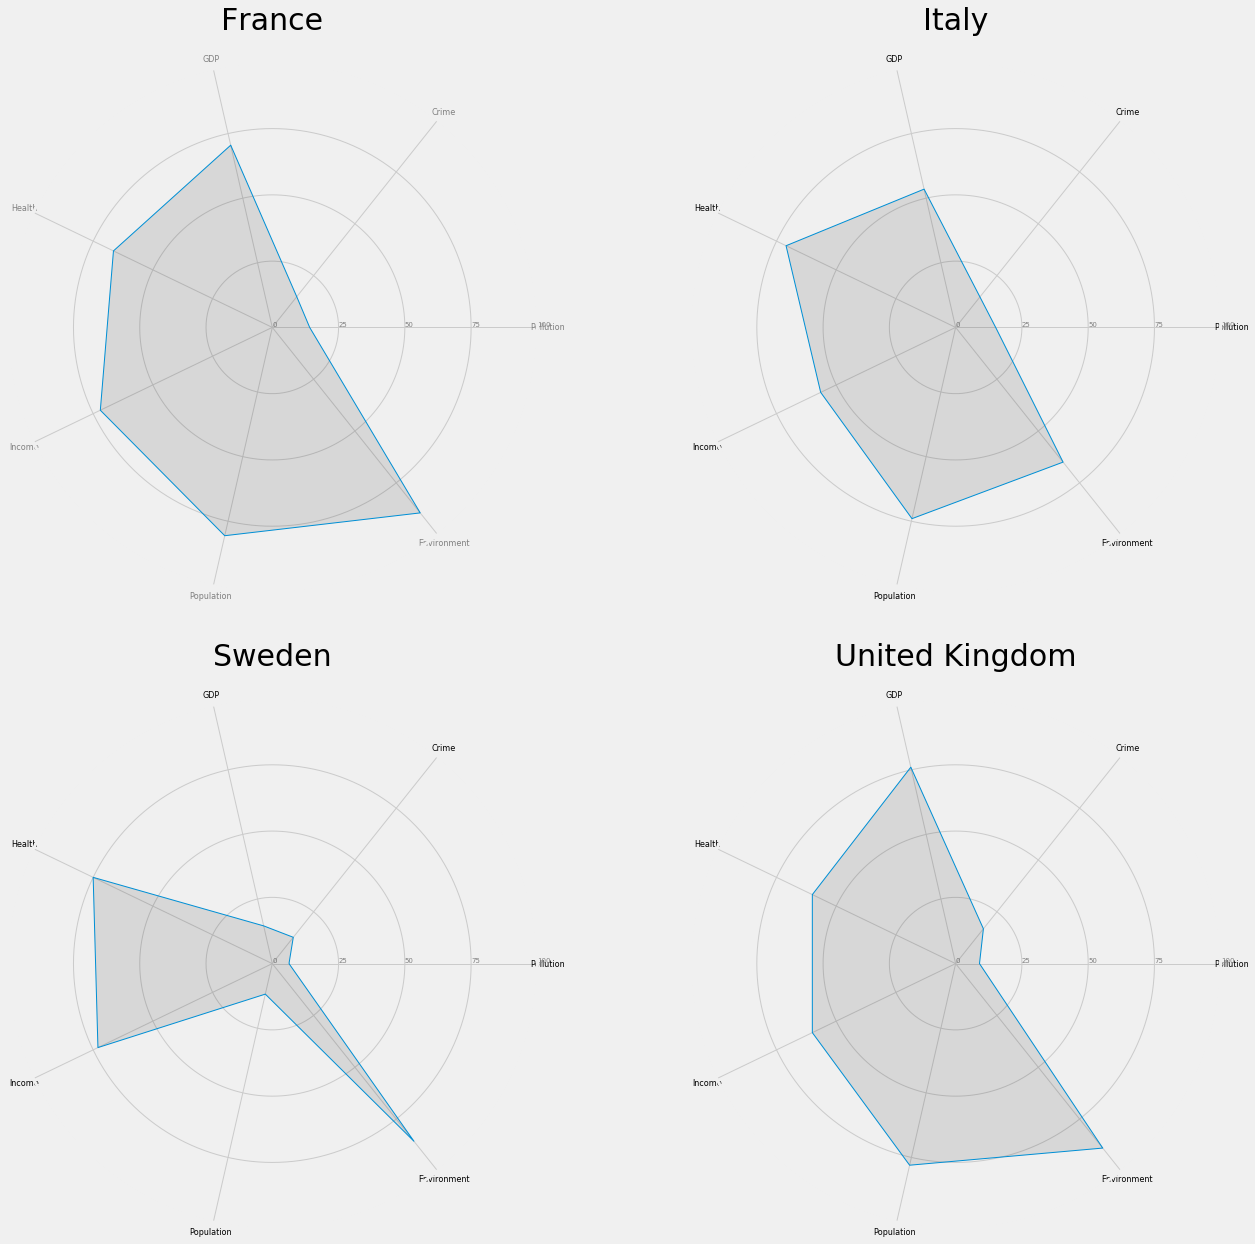

In [11]:
plt.rcParams['figure.figsize'] = (20, 20)

from math import pi

df = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [14.1, 0],
    'Crime': [14.8, 0],
    'GDP': [70.5, 0],
    'Health': [66.5, 0],
    'Income': [72, 0],
    'Population': [80.6, 0],
    'Environment': [89.5, 0]
})
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(221, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('France', fontsize = 30)

df2 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [15.1, 0],
    'Crime': [14.7, 0],
    'GDP': [53.5, 0],
    'Health': [71, 0],
    'Income': [56.5, 0],
    'Population': [74, 0],
    'Environment': [65, 0]
})
# number of variable
categories2 = list(df2)[1:]
N2 = len(categories2)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df2.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N2) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(222, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Italy', fontsize = 30)

df3 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [6.3, 0],
    'Crime': [12.7, 0],
    'GDP': [14.6, 0],
    'Health': [75, 0],
    'Income': [73, 0],
    'Population': [11.8, 0],
    'Environment': [85.7, 0]
})
# number of variable
categories3 = list(df3)[1:]
N3 = len(categories3)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df3.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N3) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(223, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Sweden', fontsize = 30)

df4 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [9, 0],
    'Crime': [16.8, 0],
    'GDP': [76, 0],
    'Health': [60, 0],
    'Income': [60, 0],
    'Population': [78, 0],
    'Environment': [89, 0]
})
# number of variable
categories4 = list(df4)[1:]
N4 = len(categories4)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df4.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N4) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(224, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('United Kingdom', fontsize = 30)
plt.show()

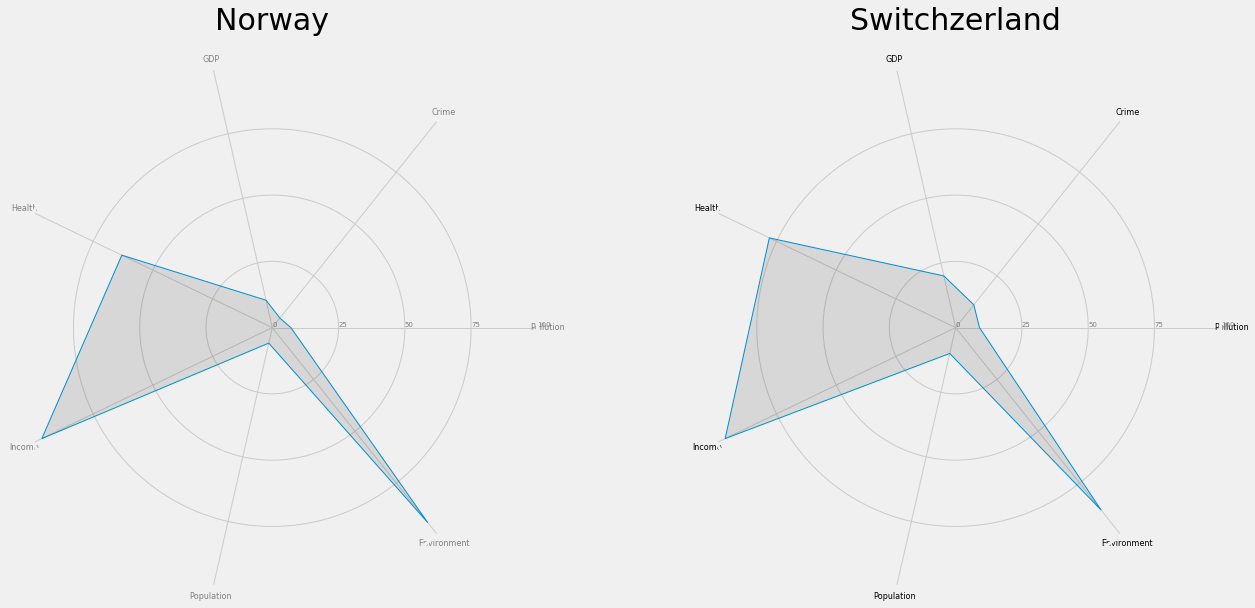

In [12]:
plt.rcParams['figure.figsize'] = (20, 20)

from math import pi

df = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [7, 0],
    'Crime': [4.6, 0],
    'GDP': [10.6, 0],
    'Health': [63, 0],
    'Income': [96.5, 0],
    'Population': [6, 0],
    'Environment': [94, 0]
})
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(221, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Norway', fontsize = 30)

df2 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [9, 0],
    'Crime': [11, 0],
    'GDP': [20, 0],
    'Health': [78, 0],
    'Income': [96.5, 0],
    'Population': [10, 0],
    'Environment': [88, 0]
})
# number of variable
categories2 = list(df2)[1:]
N2 = len(categories2)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df2.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N2) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(222, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Switchzerland', fontsize = 30)
plt.show()

> Similarly we can do for all other Countries in Europe.

>By Looking at the above radar charts, we can look at some of the major attributes which defines a country's accomodability and reliability in comparison to others. The attributes which we have explored are pollution, crime, GDP, health, income, population, and environment.

* We are now only doing the analysis for the 10 most popular countries of europe. The plots suggests that the countries like Norway, Switchzerland, and United Kingdom have lowest levels of pollution and best rating for environment satisfaction. Hence, the people who love nature must go and visit these countries as these countries promise the best nature.

* Countries like Germany, France, and United Kingdom contribute to the highest GDP around europe, making them the best destination for job seekers around the world.

* Countries like Greece, Sweden, Norway, and Switzerland have very low population, hence the people who are looking for serenity and silence or some #me time must go and explore these amazing and incredible countries around the globe.

* Countries like Norway and Switchzerland has the income levels around europe, which can attract a lot of workers and employees.

* Overall, The health is very good in Europe, seems like the European Governements are really concerned about their citizens as the data suggests that most of the people are healthy in Europe.

* Crime in almost all the countries is very low. again pointing towards an excellent governance around europe.

* According to me, Norway and Switchzerland are the two best countries to visit with the best of attributes.

## Geospatial Visualization

In [13]:
trace = [go.Choropleth(
               colorscale = 'YlOrRd',
               locationmode = 'country names',
               locations = underemployment['country'],
               text = underemployment['country'], 
               z = underemployment['med_income_underemp'],
               )]
layout = go.Layout(title = 'Under Employment in Police in European Countries',
                geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [14]:
trace = [go.Bar(
             x = underemployment['country'],
             y = underemployment['med_income_underemp'],
             name = 'Under Employment',
             marker = dict(color = 'rgb(74, 47, 44)'),
)]
layout = go.Layout(title = 'Under Employment in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

* Countries like Spain, Greece, Belgium, and Ireland have highest under Employment in comparison to other european countries.

* Whereas countries like Iceland, Switchzerland, Poland, Czechia, Slovakia, Estonia have lower under Employment rates in comparsion to other european countries.

In [15]:
trace = [go.Choropleth(
               colorscale = 'Rainbow',
               locationmode = 'country names',
               locations = unemployment['country'],
               text = unemployment['country'], 
               z = unemployment['unemp_rate'],
               )]
layout = go.Layout(title = 'Unemployment Rate in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [16]:
trace = [go.Bar(
             x = unemployment['country'],
             y = unemployment['unemp_rate'],
             name = 'Unemployment',
             marker = dict(color = 'rgb(4, 17, 54)'),
)]
layout = go.Layout(title = 'Unemployment in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

>

* Again Greece and Spain have the highest unemployment whereas all other countries of Europe are having very low level of unemployment especially Germany, Iceland, and Czecha

In [17]:
trace = [go.Choropleth(
               colorscale = 'Portland',
               locationmode = 'country names',
               locations = politics['country'],
               text = politics['country'], 
               z = politics['political_trust_rating'],
               )]
layout = go.Layout(title = 'Political Trust in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [18]:
trace = [go.Bar(
             x = politics['country'],
             y = politics['political_trust_rating'],
             name = 'Under Employment',
             marker = dict(color = 'rgb(174, 54, 144)'),
)]
layout = go.Layout(title = 'Political Satisfaction in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

* Switchzerland is having a very high political satisfaction in Europe. Other Countries like Denmark, Malta, Finland, Norway, Netherlands, Austria are also having high political satisfaction.

* Whereas Countries like Greece, Spain, Portugal, Slovakia, and Italy are having lowest Political Satisfaction rates among other European Countries.

In [19]:
trace = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',
               locations = police['country'],
               text = police['country'], 
               z = police['police_trust_rating'],
               )]
layout = go.Layout(title = 'Trust in Police in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [20]:
trace = [go.Bar(
             x = police['country'],
             y = police['police_trust_rating'],
             name = 'Under Employment',
             marker = dict(color = 'rgb(7, 147, 244)'),
)]
layout = go.Layout(title = 'Satisfaction with Police in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

* Finland and Denmark are having very high Satisfaction rates with Police Department among their People. Although most of the people in European countries are having high satisfaction with the police. 

* But, Countries like Bulgaria, Cyprus, and Slovakia are having the least rate of satisfaction with police among the people of their areas.

In [21]:
trace = [go.Choropleth(
               colorscale = 'Blackbody',
               locationmode = 'country names',
               locations = health['country'],
               text = health['country'], 
               z = health['prct_health_verygood'],
               )]
layout = go.Layout(title = 'Good Health in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [22]:
trace = go.Bar(
             x = health['country'],
             y = health['prct_health_verygood'],
             name = 'Very Good Health',
             marker = dict(color = 'rgb(10, 15, 20)'),
)
trace2 = go.Bar(
             x = health['country'],
             y = health['prct_health_good'],
             name = 'Good Health',
             marker = dict(color = 'rgb(170, 165, 160)'),
)
trace3 = go.Bar(
             x = health['country'],
             y = health['prct_health_fair'],
             name = 'Fair Health',
             marker = dict(color = 'rgb(100, 110, 120)'),
)
trace4 = go.Bar(
             x = health['country'],
             y = health['prct_health_bad'],
             name = 'Bad Health',
             marker = dict(color = 'rgb(70, 80, 90)'),
)
trace5 = go.Bar(
             x = health['country'],
             y = health['prct_health_verybad'],
             name = 'Very Bad Health',
             marker = dict(color = 'rgb(5, 10, 5)'),
)
data = [trace, trace2, trace3, trace4, trace5]
layout = go.Layout(title = 'Health in Europe',
                  barmode = 'relative')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

* Cyrus, Greece, Ireland, Iceland, Norway, Sweden, Switchzerland and United Kingdom are having very high rate of very good health.

* Whereas the countries such as Estonia, Italy, Lithuania, Latvia, Portugal, and Turkey are having very low rate of good health among the people also, have very high rate of bad health. Pointing that these countries are not taking proper measures under Health and Supplements of the people.

In [23]:
trace = [go.Choropleth(
               colorscale = 'Picnic',
               locationmode = 'country names',
               locations = pollution['country'],
               text = pollution['country'], 
               z = pollution['prct_rpt_pollution'],
               )]
layout = go.Layout(title = 'Avg. Pollution in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [24]:
trace = [go.Bar(
             x = pollution['country'],
             y = pollution['prct_rpt_pollution'],
             name = 'Pollution',
             marker = dict(color = 'rgb(220, 220, 220)'),
)]
layout = go.Layout(title = 'Pollution in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

* Clearly Malta, Germany, and Turkey are the most populated Countries among other european countries. Whereas most of the countries in Europe have average rate of pollution.

* Whereas Countries like Finland, Switchzerland, Norway, Ireland, Denmark have very low rate of pollution.

In [25]:
trace = [go.Choropleth(
               colorscale = 'Blues',
               locationmode = 'country names',
               locations = weather['country'],
               text = weather['country'], 
               z = weather['avg_precipitation'],
               )]
layout = go.Layout(title = 'Avg. Precipitation in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [26]:
trace = go.Bar(
             x = weather['country'],
             y = weather['avg_temp'],
             name = 'Average Temp.',
             marker = dict(color = 'rgb(250, 250, 200)'),
)
trace2 = go.Bar(
             x = weather['country'],
             y = weather['avg_high_temp'],
             name = 'Avg. High Temp',
             marker = dict(color = 'rgb(20, 20, 20)'),
)
trace3 = go.Bar(
             x = weather['country'],
             y = weather['avg_low_temp'],
             name = 'Avg. Low Temp',
             marker = dict(color = 'rgb(186, 200, 250)'),
)
trace4 = go.Bar(
             x = weather['country'],
             y = weather['avg_precipitation'],
             name = 'Avg. Precipitation',
             marker = dict(color = 'rgb(220, 190, 220)'),
)
df = [trace, trace2, trace3, trace4]
layout = go.Layout(title = 'Weather in Europe',
                  barmode = 'relative')
fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [27]:
trace = [go.Choropleth(
               colorscale = 'Viridis',
               locationmode = 'country names',
               locations = weather['country'],
               text = weather['country'], 
               z = weather['avg_temp'],
               )]
layout = go.Layout(title = 'Avg. Temperature in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [28]:
trace = [go.Choropleth(
               colorscale = 'Reds',
               locationmode = 'country names',
               locations = low_savings['country'],
               text = low_savings['country'], 
               z = low_savings['prct_low_savings'],
               )]
layout = go.Layout(title = 'Low Savings in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [29]:
trace = [go.Bar(
             x = low_savings['country'],
             y = low_savings['prct_low_savings'],
             name = 'Low Savings',
             marker = dict(color = 'rgb(250, 200, 190)'),
)]
layout = go.Layout(title = 'Low Savings in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

* Countries such as Belgium, Cyprus, Greece, Croatia, Latvia, Romania, Lithuania, Hungary, and Greece have low Savings among the European Countries.

* Whereas Countries like Switchzerland, Luxembourg, Norway, Sweden , Malta are having good amounts of savings.

In [30]:
trace = [go.Choropleth(
               colorscale = 'Cividis',
               locationmode = 'country names',
               locations = life_expectancy['country'],
               text = life_expectancy['country'], 
               z = life_expectancy['life_expect'],
               )]
layout = go.Layout(title = 'Life Expectancy in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [31]:
trace = [go.Bar(
             x = life_expectancy['country'],
             y = life_expectancy['life_expect'],
             name = 'Life Expectancy',
             marker = dict(color = 'rgb(190, 220, 250)'),
)]
layout = go.Layout(title = 'Life Expectancy in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

* It is very clearly seen from the above graph that the life expectancy is very high among all the european countries. Looks like the European Government cares a lot about their citizens or might be the citizens are themselves very much careful regarding their Health.

In [32]:
trace = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',
               locations = leisure_satisfaction['country'],
               text = leisure_satisfaction['country'], 
               z = leisure_satisfaction['prct_leisure_satis_high'],
               )]
layout = go.Layout(title = 'High Leisure Satisfaction in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [33]:
trace = go.Bar(
             x = leisure_satisfaction['country'],
             y = leisure_satisfaction['prct_leisure_satis_high'],
             name = 'High Satisfaction',
             marker = dict(color = 'rgb(240, 240, 240)'),
)
trace2 = go.Bar(
             x = leisure_satisfaction['country'],
             y = leisure_satisfaction['prct_leisure_satis_med'],
             name = 'Medium Satisfaction',
             marker = dict(color = 'rgb(90, 30, 40)'),
)
trace3 = go.Bar(
             x = leisure_satisfaction['country'],
             y = leisure_satisfaction['prct_leisure_satis_low'],
             name = 'Low Satisfaction',
             marker = dict(color = 'rgb(138, 208, 138)'),
)

df = [trace, trace2, trace3]
layout = go.Layout(title = 'Leisure Satisfaction in Europe',
                  barmode = 'relative')
fig = go.Figure(data = df, layout = layout)
iplot(fig)

* Only Two of the European Countries are having low Leisure Satisfaction, namely Turkey and Bulgaria. Exceptt these two all other countries are very much satisfied with their Leisure Satisfaction, especially Netherlands, and Finland.

In [34]:
trace = [go.Choropleth(
               colorscale = 'Rainbow',
               locationmode = 'country names',
               locations = job_satisfaction['country'],
               text = job_satisfaction['country'], 
               z = job_satisfaction['prct_job_satis_high'],
               )]
layout = go.Layout(title = 'High Job Satisfaction in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [35]:
trace = go.Bar(
             x = job_satisfaction['country'],
             y = job_satisfaction['prct_job_satis_high'],
             name = 'job_satisfaction',
             marker = dict(color = 'orange'),
)
trace2 = go.Bar(
             x = job_satisfaction['country'],
             y = job_satisfaction['prct_job_satis_med'],
             name = 'job_satisfaction',
             marker = dict(color = 'lightgreen'),
)
trace3 = go.Bar(
             x = job_satisfaction['country'],
             y = job_satisfaction['prct_job_satis_low'],
             name = 'job_satisfaction',
             marker = dict(color = 'pink'),
)
df = [trace, trace2, trace3]
layout = go.Layout(title = 'Job Satisfaction in Europe',
                   barmode = 'relative')
fig = go.Figure(data = df, layout = layout)
iplot(fig)

* Only Two of the European Countries are having low Job Satisfaction, namely Turkey and Bulgaria. Exceptt these two all other countries are very much satisfied with their Leisure Satisfaction, especially Netherlands, and Finland.

In [36]:
trace = [go.Choropleth(
               colorscale = 'Greys',
               locationmode = 'country names',
               locations = gdp['country'],
               text = gdp['country'], 
               z = gdp['gdp'],
               )]
layout = go.Layout(title = 'GDP in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [37]:
trace = [go.Bar(
             x = gdp['country'],
             y = gdp['gdp'],
             name = 'GDP',
             marker = dict(color = 'rgb(96, 76, 56)'),
)]
layout = go.Layout(title = 'GDP in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

> Germany is having the highest GDP in Europe, then United Kingdom, France and Italy are also having very high GDP in comparison to other European Countries. Countries like Spain and Netherlands also have good GDP.

> But Some Cuntries like Cyrus, Luxembourg, Hungary, Malta, Slovenia, Malta, Iceland have very low GDPs in compariso to other European Countries.

In [38]:
trace = [go.Choropleth(
               colorscale = 'Blackbody',
               locationmode = 'country names',
               locations = crime['country'],
               text = crime['country'], 
               z = crime['prct_rpt_crime'],
               )]

layout = go.Layout(title = '%age of Reported Crime in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [39]:
trace = [go.Bar(
             x = crime['country'],
             y = crime['prct_rpt_crime'],
             name = 'Crime',
             marker = dict(color = 'rgb(90, 20, 50)'),
)]


layout = go.Layout(title = 'Crime in Europe')
fig = go.Figure(data = trace, layout = layout)


iplot(fig)

* As we can see Bulgaria is the Crime Leader in the European Countries, But the Countries like United Kingdom, Netherlands, Italy and France are also having crime rates in their respectiv regions. 

* Countries like Croatia, Iceland, Lithuania, Norway, and Poland have very low Crime rates.

In [40]:
trace = [go.Choropleth(
               colorscale = 'Portland',
               locationmode = 'country names',
               locations = close_relations['country'],
               text = close_relations['country'], 
               z = close_relations['prct_close_relat'],
               )]


layout = go.Layout(title = '%age of Close Relations in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [41]:
trace = [go.Bar(
             x = close_relations['country'],
             y = close_relations['prct_close_relat'],
             name = 'Close Relations',
             marker = dict(color = 'rgb(90, 120, 50)'),
)]
layout = go.Layout(title = 'Close Relations in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [42]:
trace = [go.Choropleth(
               colorscale = 'Jet',
               locationmode = 'country names',
               locations = population['country'],
               text = population['country'], 
               z = population['prct_yng_adt_pop'],
               )]

layout = go.Layout(title = '%age of Young population in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)











In [43]:
trace = go.Bar(
             x = life_expectancy['country'],
             y = life_expectancy['life_expect'],
             name = 'Population',
             marker = dict(color = 'rgb(8, 19, 20)'),
)
trace = go.Bar(
             x = life_expectancy['country'],
             y = life_expectancy['life_expect'],
             name = 'Young Population',
             marker = dict(color = 'rgb(135, 135, 135)'),
)
df = [trace, trace2]

layout = go.Layout(title = 'Population in Europe',
                  barmode = 'relative')
fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [44]:

trace = [go.Choropleth(
               colorscale = 'YlOrRd',
               locationmode = 'country names',
               locations = population['country'],
               text = population['country'], 
               z = population['total_pop'],
               )]

layout = go.Layout(title = 'population in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,)
                  )

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [45]:
df = pd.DataFrame(df)
df.columns

RangeIndex(start=0, stop=64, step=1)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzhdTg4Wl3b7yFQKrQ_m8Ll3eLhXzYGVKwkuiLjsqnp1utkmf-Bg" width="450px">
